<a href="https://colab.research.google.com/github/gustavo-plc/Curso_py/blob/main/AEDI_PROVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTEBOOK DESTINADO A REGISTRAR AS TAREFAS DA DISCIPLINA DE AEDI - 1º/2025
### PROFESSOR: JOÃO GABRIEL DE MORAES SOUZA
### ALUNO: GUSTAVO PARREIRA LIMA CUNHA

# **PROVA**

## QUESTÃO 1

### 1. Análise Descritiva dos Dados (20%)

In [15]:
import pandas as pd

# Especificação do caminho do arquivo csv

path = '/content/drive/MyDrive/AEDI/kc_house_data.csv'

dados = pd.read_csv(path)

# teste de exibição do df

print(dados)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

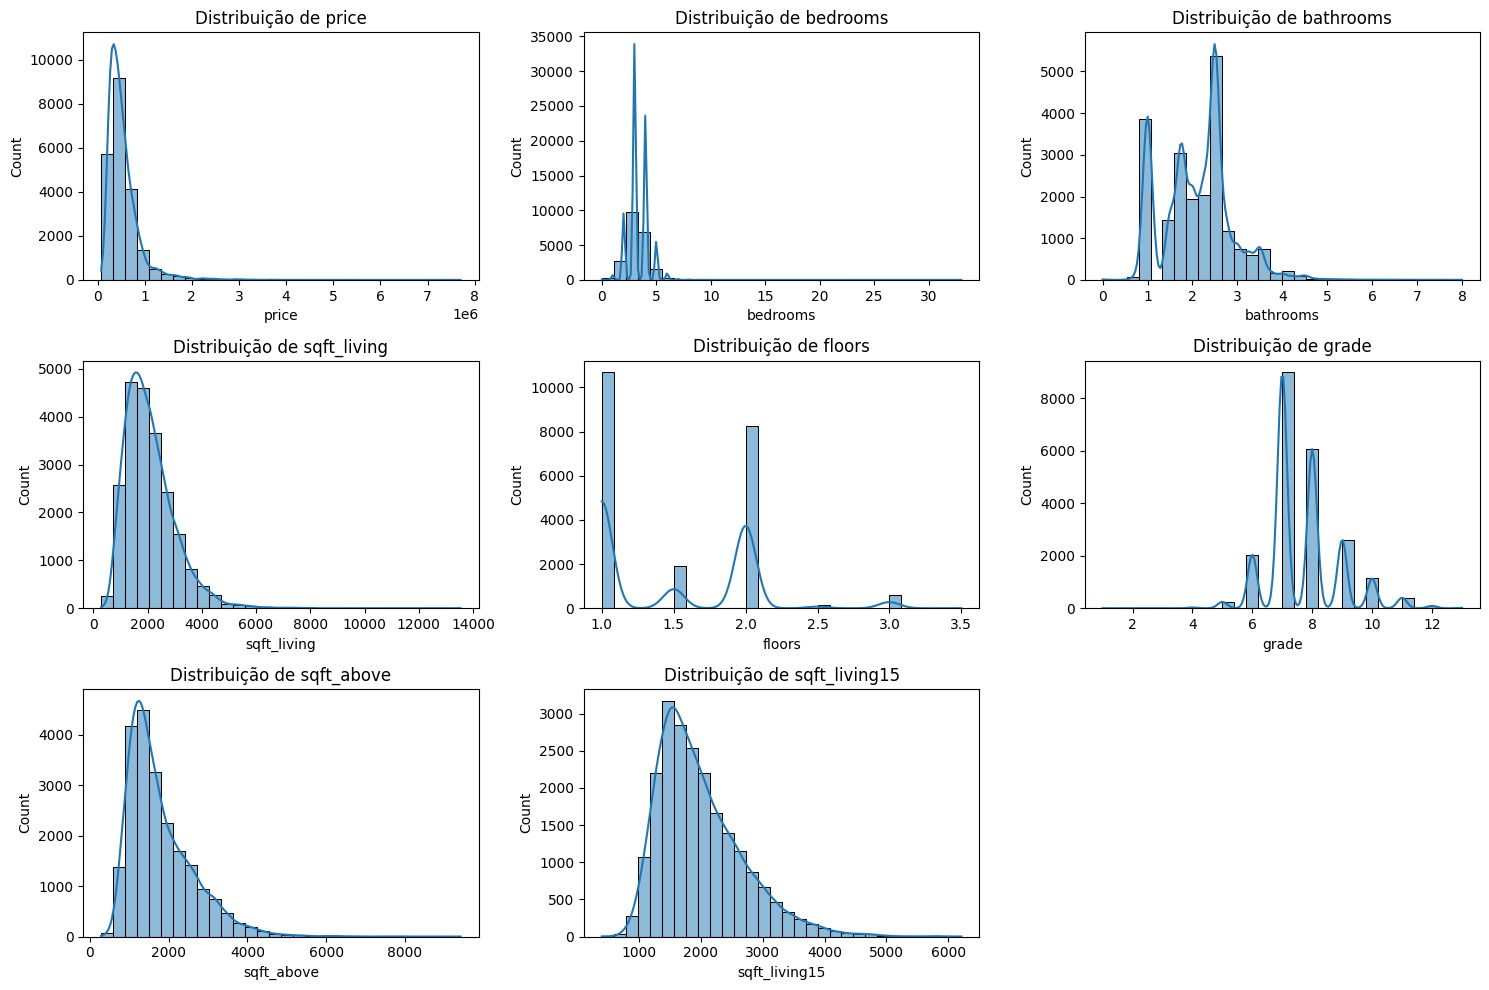


Correlação entre variáveis numéricas:


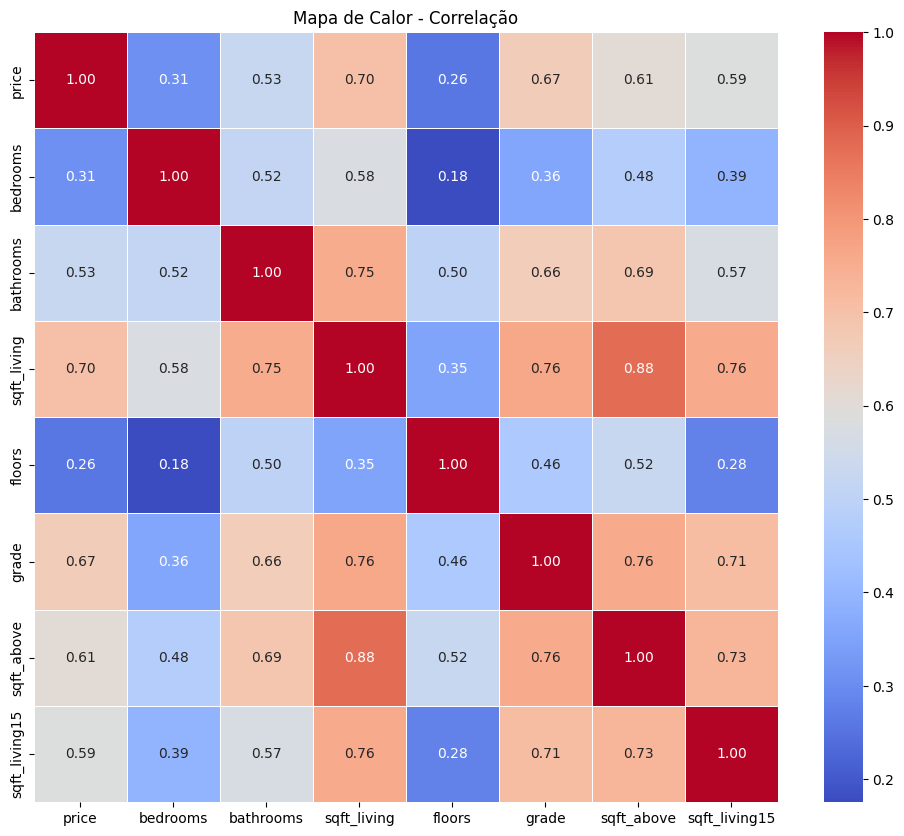


Dispersão entre as variáveis numéricas relevantes e price:


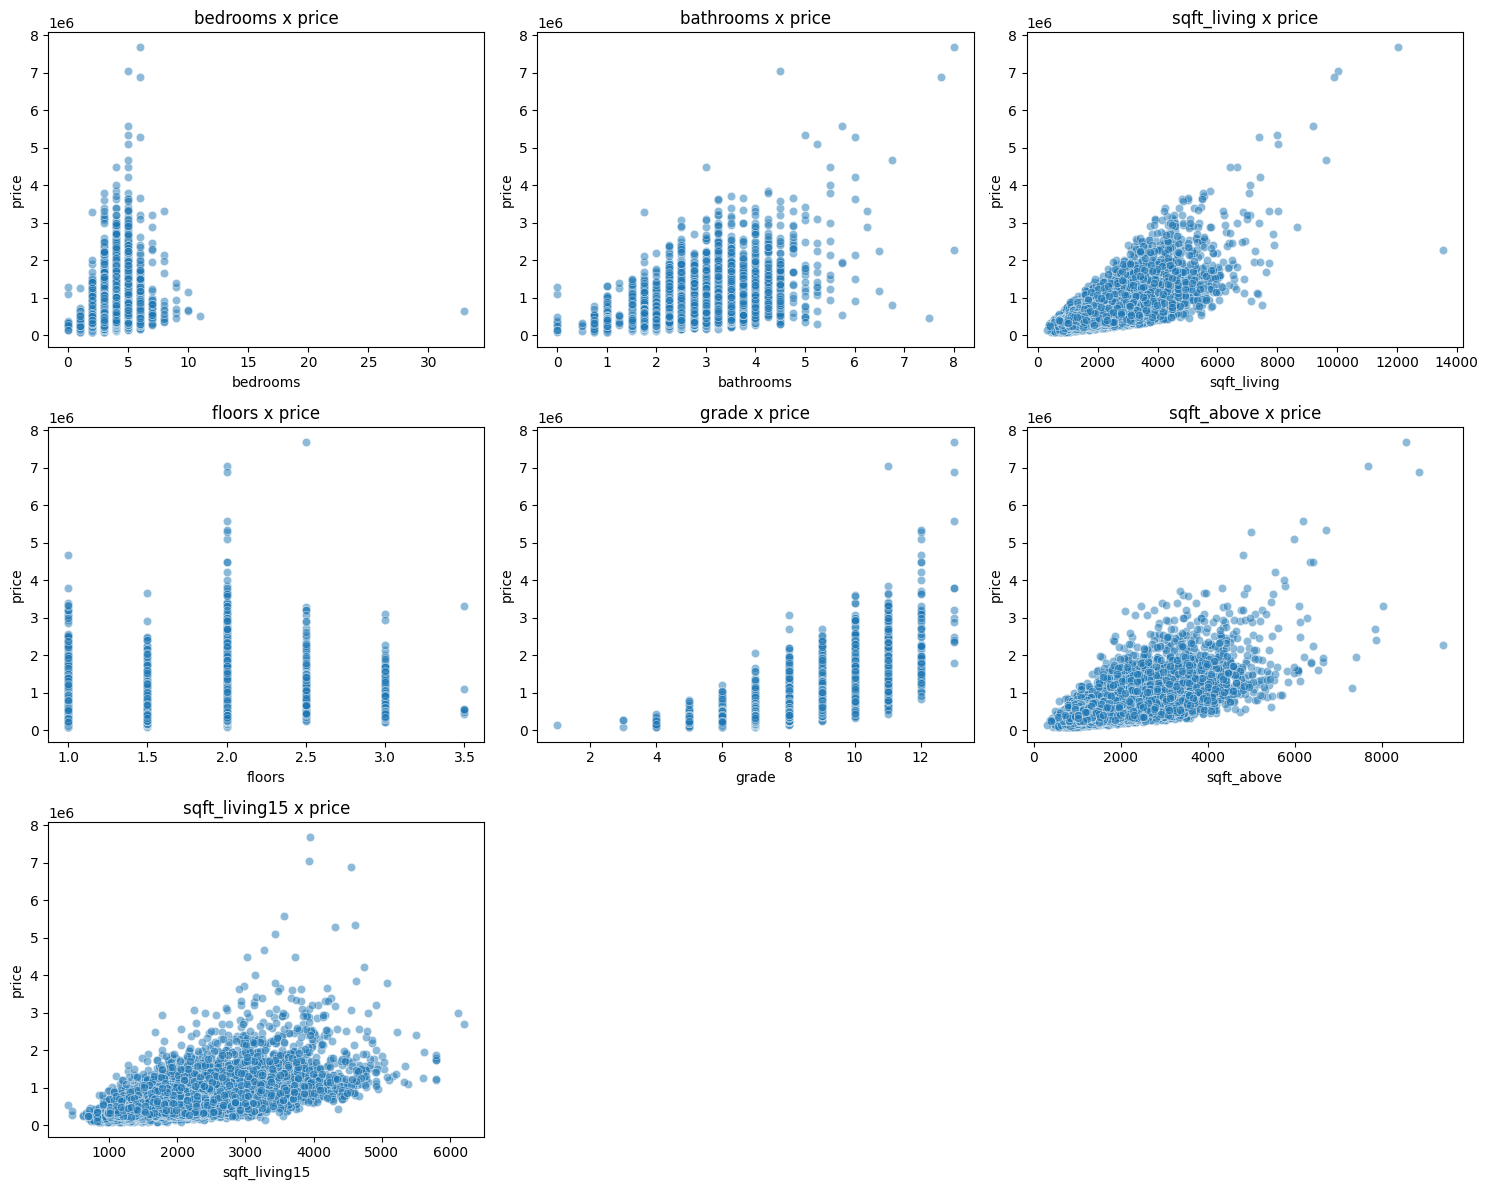

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Informações básicas do DataFrame
print(dados.info())

# Verificar valores ausentes
print("\nValores nulos por coluna:")
print(dados.isnull().sum())

# DATAFRAME SEM REGISTROS AUSENTES!

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(dados.describe().T)

# Mediana
print("\nMedianas:")
print(dados.median(numeric_only=True))

# seleção das variáveis numéricas e relevantes

numeric_cols = [col for col in dados.select_dtypes(include='number').columns
                if col not in ['id', 'zipcode', 'sqft_lot', 'lat', 'waterfront', 'long', 'view', 'sqft_lot', 'sqft_lot15', 'date', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated']]


print(numeric_cols)

print("\nDistribuição das variáveis numéricas")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols[:9]):
    plt.subplot(3, 3, i+1)
    sns.histplot(dados[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

# Matriz de correlação
print("\nCorrelação entre variáveis numéricas:")
corr = dados[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor - Correlação')
plt.show()

# gráficos de dispersão para todas as variáveis em numeric_cols
target = 'price'

print(f"\nDispersão entre as variáveis numéricas relevantes e {target}:")

num_plots = len(numeric_cols)
num_cols_per_row = 3
num_rows = (num_plots + num_cols_per_row - 1) // num_cols_per_row

plt.figure(figsize=(num_cols_per_row * 5, num_rows * 4))

features_for_scatter = [col for col in numeric_cols if col != target]

for i, feature in enumerate(features_for_scatter):
    plt.subplot(num_rows, num_cols_per_row, i + 1)
    sns.scatterplot(data=dados, x=feature, y=target, alpha=0.5)
    plt.title(f'{feature} x {target}')
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

Após análise da distribuição das variáveis VS o preço das residências foi possível extrair algumas variáveis e trabalhar somente com as supostamente relevantes no array numeric_cals. Em seguida, o mapa de calor da matriz de correlação mostrou que de fato as variáves escolhidas são relevantes para a definição do preço de venda, pois possuem alto valor de correlação (>0.5). Portanto, o modelo só levará em conta as variáveis estatisticamente relevantes.

### 2. Construção do Modelo de Regressão Linear (30%)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Seleção de variáveis com boa correlação
X = dados[['bedrooms','bathrooms', 'sqft_living', 'grade', 'floors', 'sqft_living15']]

y = dados['price']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação e treino do modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd


# Fazer previsões com o conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliação do modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Extrair os coeficientes e o intercepto do modelo
intercepto = modelo.intercept_
coeficientes = modelo.coef_

# Imprimir o intercepto (coeficiente linear)
print("\n--- Coeficientes da Regressão Linear ---")
print(f"Intercepto (b0): {intercepto:,.2f}")
print("O intercepto é o valor esperado de 'price' quando todas as outras variáveis são zero. Não Possui significado real.")

# Coeficientes (b1, b2, etc.) com seus respectivos nomes
print("\nCoeficientes (b1, b2, ...):")
for i, col in enumerate(X.columns):

    print(f"  - {col} (b{i+1}): {coeficientes[i]:,.2f}")


# Métricas de avaliação do modelo
print("\nMétricas de Avaliação do Modelo ---")
print(f"R² (Coeficiente de Determinação): {r2:.4f}")
print(f"MAE (Erro Médio Absoluto): {mae:,.2f}")
print(f"MSE (Erro Quadrático Médio): {mse:,.2f}")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:,.2f}")


--- Coeficientes da Regressão Linear ---
Intercepto (b0): -466,326.67
O intercepto é o valor esperado de 'price' quando todas as outras variáveis são zero. Não Possui significado real.

Coeficientes (b1, b2, ...):
  - bedrooms (b1): -39,387.44
  - bathrooms (b2): -9,127.98
  - sqft_living (b3): 216.08
  - grade (b4): 97,999.17
  - floors (b5): -38,322.40
  - sqft_living15 (b6): 7.71

Métricas de Avaliação do Modelo ---
R² (Coeficiente de Determinação): 0.5507
MAE (Erro Médio Absoluto): 165,364.00
MSE (Erro Quadrático Médio): 67,929,195,508.51
RMSE (Raiz do Erro Quadrático Médio): 260,632.30


### 3. Interpretação dos Resultados (10%)

O coeficiente negativo de bedrooms, bathrooms e de floors pode ser um indício de multicolinearidade entre as variáveis.

O modelo de regressão linear obteve os seguintes coeficientes:

Intercepto (b₀ = -466.326,67): Esse valor representa o preço estimado de uma casa caso todas as outras variáveis fossem zero. Não tem significado real ness contexto.

Coeficientes das Variáveis:
bedrooms (b₁ = -39.387,44)
Cada quarto a maisrepresenta uma redução de U$ 39.387,44 no preço, mantendo as outras variáveis constantes. É um resultado não esperado, pois teoricamente mais quartos representariam mais valor agregado das casas. Pode indicar ruído nos dados ou algum erro no modelo.

bathrooms (b₂ = -9.127,98)
Banheiros adicionais também impactam negativamente o preço, o que é contraintuitivo. Também será melhor explorado posteriormente. Entretanto, pode indicar também correlação entre muitos banheiros e outras variáveis não explicadas (por exemplo, imóveis antigos ou mal localizados possuem muitos banheiros).

sqft_living (b₃ = 216,08)
Cada unidade adicional de área útil (em pés quadrados) aumenta o preço em U$ 216,08, o que faz sentido, já que maior área construída agregar maior valor.

grade (b₄ = 97.999,17)
A nota da construção tem peso alto: cada ponto a mais está associado a um aumento de quase U$ 98 mil no preço, mostrando que a qualidade percebida da construção é um dos fatores mais relevantes.

floors (b₅ = -38.322,40)
Essa variável merece atenção, pois mais andares estão relacionados a uma queda no preço médio. Isso pode indicar preferência por casas térreas ou algum ruído ou presença de multicolinearidade.

sqft_living15 (b₆ = 7,71)
Refere-se à média da área útil das 15 casas vizinhas. Tem efeito positivo, mas discreto: U$ 7,71 por pé quadrado. Reforça a ideia de que o valor do imóvel também é influenciado pela vizinhança.

2. Avaliação da Qualidade do Modelo
R² = 0,5507
O modelo consegue explicar 55,07% da variação nos preços com as variáveis fornecidas. É um valor razoável para dados de mercado imobiliário, que costumam ter ruídos e variáveis não observadas.

MAE : US 165.364,00
O erro médio absoluto indica que, em média, o modelo erra o preço estimado em cerca de U$ 165 mil. É um valor alto para o erro, o que leva a uma necessidade de melhorá-lo.

RMSE : US 260.632,30
A raiz do erro quadrático médio mostra a dispersão dos erros. Erros grandes têm mais peso aqui, e o valor ainda é consideravelmente alto.

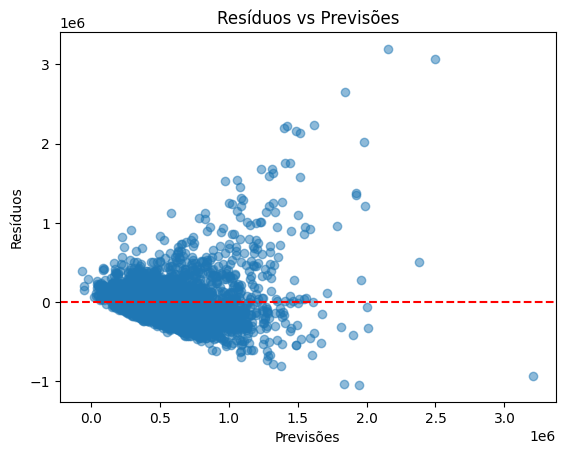

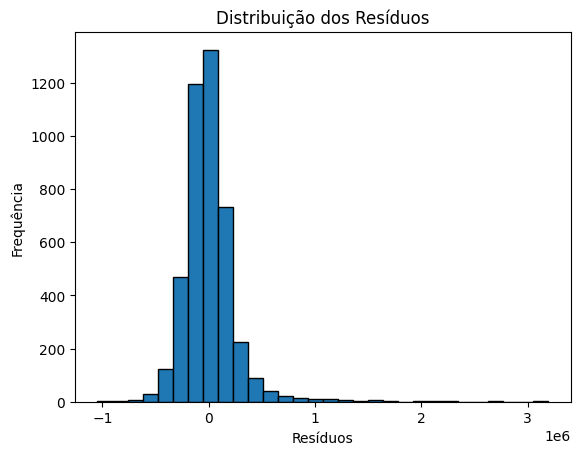

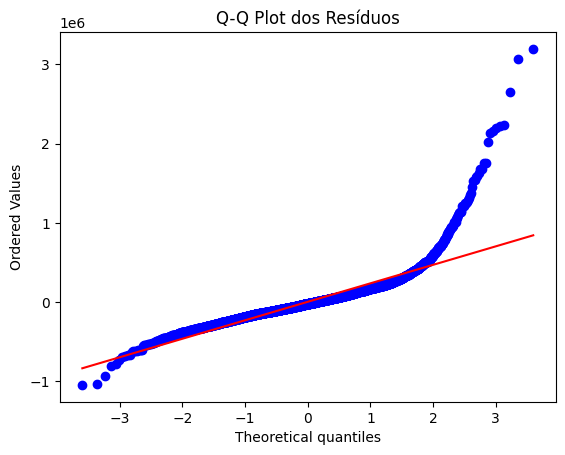



Estatística do teste: 0.8014

Valor-p: 0.0000

resíduos não seguem uma distribuição normal (rejeita H0).



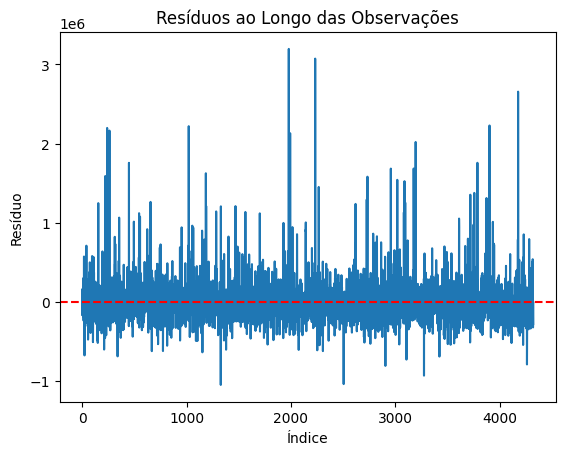

In [19]:
# VERIFICAÇÃO DOS PRESSUPOSTOS DA REGRESSÃO LINEAR

import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import scipy.stats as stats


# Previsões com o conjunto de teste
y_pred = modelo.predict(X_test)

# Cálculo dos resíduos
residuos = y_test - y_pred

# Análises visuais

plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Previsões')
plt.show()
print()

plt.hist(residuos, bins=30, edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Resíduos')
plt.show()
print()

stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot dos Resíduos')
plt.show()
print()

# Teste de Shapiro-Wilk
stat, p_valor = shapiro(residuos)
print()
print(f'Estatística do teste: {stat:.4f}')
print()
print(f'Valor-p: {p_valor:.4f}')
print()
if p_valor > 0.05:
    print("resíduos seguem uma distribuição normal (não rejeita H0).")
else:
    print("resíduos não seguem uma distribuição normal (rejeita H0).")

print()
plt.plot(residuos.values)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Resíduo')
plt.title('Resíduos ao Longo das Observações')
plt.show()


# H0 (hipótese nula): Os resíduos seguem distribuição normal.

# p_valor > 0.05: não rejeita H0 : normalidade

# p_valor <= 0.05: rejeita H0 : resíduos não seguem distribuição normal.


Resíduos não distribuídos conforme curva normal, apresentam assimetria e heterocedasticidade. Foi observado que o modelo não atende aos pressupostos da regressão linear.

### 4. Ajustes no Modelo (30%)

A primeira tentativa para ajuste de modelo será ajustar a variável alvo ('price') aplicando ln('price') e avaliar a multicolinearidade ebtre as variáveis. Sm seguida, treinar o modelo novamente, avaliando seus resultados.

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Aplicar log na variável target
y_log = np.log(dados['price'])

# Seleção das variáveis independentes
X = dados[['bedrooms','bathrooms', 'sqft_living', 'grade', 'floors', 'sqft_living15']]
y = y_log

# Cálculo do VIF
X_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variável"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print("VIF das variáveis:")
print(vif_data)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
modelo_log = LinearRegression()
modelo_log.fit(X_train, y_train)

#  Prever em escala log e reverter para escala original
y_pred_log = modelo_log.predict(X_test)
y_pred_original = np.exp(y_pred_log)

#  Avaliação do desempenho em escala original
y_test_original = np.exp(y_test)

mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred_original)

print("\nDesempenho do modelo ajustado")
print(f"MAE: R$ {mae:,.2f}")
print(f"MSE: {mse:,.2f}")
print(f"RMSE: R$ {rmse:,.2f}")
print(f"R²: {r2:.4f}")


VIF das variáveis:
        Variável        VIF
0          const  78.153029
1       bedrooms   1.599750
2      bathrooms   2.864624
3    sqft_living   4.666741
4          grade   3.093656
5         floors   1.441553
6  sqft_living15   2.637705

Desempenho do modelo ajustado
MAE: R$ 156,979.13
MSE: 82,574,154,508.67
RMSE: R$ 287,357.19
R²: 0.4538


O cálculo do VIF não evidenciou presença de multicolinearidade e a transformação da variável dependente não gerou resultados positivos. Será implementada uma engenharia de features para tentar obter features mais significativas a partir das variáveis já presentes no dataset, bem como manter a variável dependente sem aplicação de log.

As seguintes novas variáveis serão criadas:

bathrooms_per_bedroom
sqft_per_floor
age
recent_renovation (booleano 0 ou 1)

Substituir zipcode pela média de preços por região. Para isso, criou-se uma nova variável chamada zipcode_avg_price, que representa o preço médio dos imóveis por zipcode.



In [21]:
# retomando variável independente sem transformação logarítimica

y = dados['price']

In [22]:
import numpy as np
import pandas as pd

# Cópia de segurança do dataframe
dados_novo = dados.copy()

# Remover linhas com bedrooms = 0 para evitar divisão por zero
dados_novo = dados_novo[dados_novo['bedrooms'] > 0]
dados_novo = dados_novo[dados_novo['floors'] > 0]

# Novas variáveis
dados_novo['bathrooms_per_bedroom'] = dados_novo['bathrooms'] / dados_novo['bedrooms']
dados_novo['sqft_per_floor'] = dados_novo['sqft_living'] / dados_novo['floors']
dados_novo['age'] = 2025 - dados_novo['yr_built']
dados_novo['recent_renovation'] = (dados_novo['yr_renovated'] > 0).astype(int)

# Média de preços por região (zipcode)
zipcode_avg = dados_novo.groupby('zipcode')['price'].mean().to_dict()
dados_novo['zipcode_avg_price'] = dados_novo['zipcode'].map(zipcode_avg)

# Verificando se tudo foi criado
print(dados_novo[['bathrooms_per_bedroom', 'sqft_per_floor', 'age', 'recent_renovation', 'zipcode_avg_price']].head())

print()

print(dados_novo.columns)


   bathrooms_per_bedroom  sqft_per_floor  age  recent_renovation  \
0               0.333333          1180.0   70                  0   
1               0.750000          1285.0   74                  1   
2               0.500000           770.0   92                  0   
3               0.750000          1960.0   60                  0   
4               0.666667          1680.0   38                  0   

   zipcode_avg_price  
0      310612.755725  
1      469899.427873  
2      462480.035336  
3      551688.673004  
4      685605.775510  

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'bathrooms_per_bedroom',
       'sqft_per_floor', 'age', 'recent_renovation', 'zipcode_avg_price'],
      dtype='object')


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Seleção de novas variáveis

X = dados_novo[['bathrooms_per_bedroom', 'sqft_living', 'grade', 'floors',
                'sqft_living15', 'sqft_per_floor', 'age',
                'recent_renovation', 'zipcode_avg_price']]

# Adiciona constante para o cálculo do VIF
X_const = sm.add_constant(X)

# Calcula o VIF para cada variável
vif_data = pd.DataFrame()
vif_data["Variável"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

#  resultados
print(vif_data)

                Variável         VIF
0                  const  150.195275
1  bathrooms_per_bedroom    1.412635
2            sqft_living    9.840958
3                  grade    3.363469
4                 floors    6.188284
5          sqft_living15    2.732057
6         sqft_per_floor    8.040727
7                    age    1.841006
8      recent_renovation    1.102221
9      zipcode_avg_price    1.297665


O cálculo do VIF permite retirar algumas variáveis redundantes, como:

sqft_per_floor    8.040727

floors    6.188284

sqft_living    9.840958



In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Seleção de variáveis com boa correlação

X = dados_novo[['bathrooms_per_bedroom', 'grade',
                'sqft_living15', 'age',
                'recent_renovation', 'zipcode_avg_price']]


y = dados_novo['price']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação e treino do modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

REAVALIAÇÃO DO MODELO AJUSTADO:

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

#  Previsões
y_pred = modelo.predict(X_test)

#  Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#  Impressão dos Resultados
print("Avaliação do Modelo Linear:")
print(f"MAE : R$ {mae:,.2f}")
print(f"MSE : {mse:,.2f}")
print(f"RMSE: R$ {rmse:,.2f}")
print(f"R²  : {r2:.4f}")


Avaliação do Modelo Linear:
MAE : R$ 123,575.57
MSE : 43,774,658,876.88
RMSE: R$ 209,223.94
R²  : 0.6779


A MANUTENÇÃO DA VARIÁVEL DEPENDENTE SEM TRANSFORMAÇÃO LOGARÍTIMICA ALIADA À ENGENHARIA DE FEATURES PERMITIU OBTER UM MODELO QUE EXPLICA 67,8% DA VARIAÇÃO DOS PREÇOS E QUE POSSUI MENOR ERRO ASSOCIADO, COM MENOR ERRO ASSOCIADO (MAE)

### 5. Tomada de Decisão (10%)

* ESSE RESULTADO PODE SER APLICADO EM UM CONTEXTO REAL DE MERCADO IMOBILIÁRIO
PARA PREVER O PREÇO DE VENDA DE UMA CASA, MAS NÃO COMO ÚNICA FERRAMENTA, MAS COMO FORMA COMPLEMENTAR DE SUPORTE PARA DETERMINAÇÃO DO VALOR DA CASA. HÁ OUTRAS VARIÁVEIS QUE INFLUENCIAM FORTEMENTE NO VALOR QUE NÃO FORAM CONSIDERADAS NO MODELO, COMO SE A CASA É OU NÃO MOBILIADA, SE O VENDEDOR ESTÁ OU NÃO COM PRESSA DE VENDÊ-LA, ETC.

* PODE SER UTILIZADO PARA PREVISÃO DO PREÇO DE VENDA, ANTES OU DEPOIS DE CONSTRUÍDA A CASA. NOS CASOS EM QUE A RESIDÊNCIA NÃO ESTEJA CONSTRUÍDA, O MODELO TAMBÉM É CAPAZ DE DAR SUPORTE A PREVISÕES DE LUCRO DA CONSTRUTORA.

* ESSE TIPO DE INFORMAÇÃO PODE SER USADO COMO BASE PARA ESTRATÉGIAS COMO POSICIONAMENTO DE MERCADO DA EMPRESA. POR EXEMPLO, ANALISAR A REGIÃO PARA DECISÃO ESTRATÉGICA DE CONSTRUÇÃO DE IMÓVEIS, ANALISAR VIABILIDADE DE COMPRA/REFORMA/REVENDA, ENTRE OUTROS.

## QUESTÃO 2

### a) Análise Descritiva dos Dados (10%)

In [38]:
import pandas as pd

# Especificação do caminho do arquivo csv

path = '/content/drive/MyDrive/AEDI/hotel_bookings.csv'

dados = pd.read_csv(path)

# Estrutura da base
dados.info()

# Estatísticas para variáveis numéricas
dados.describe()

# Valores ausentes
dados.isnull().sum().sort_values(ascending=False)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,0
company,112593
agent,16340
country,488
children,4
arrival_date_month,0
arrival_date_week_number,0
hotel,0
is_canceled,0
stays_in_weekend_nights,0
arrival_date_day_of_month,0


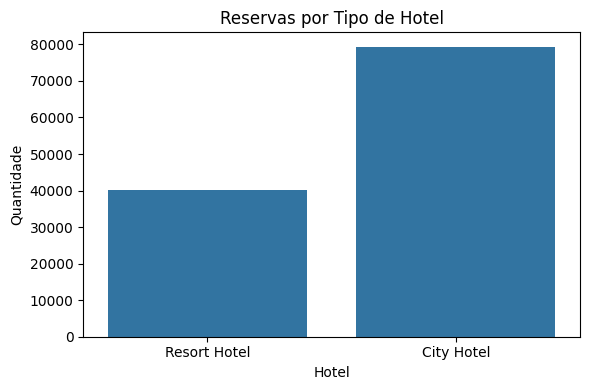

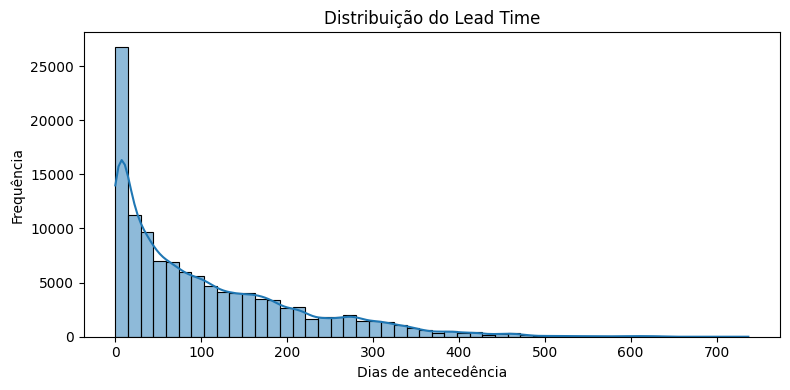

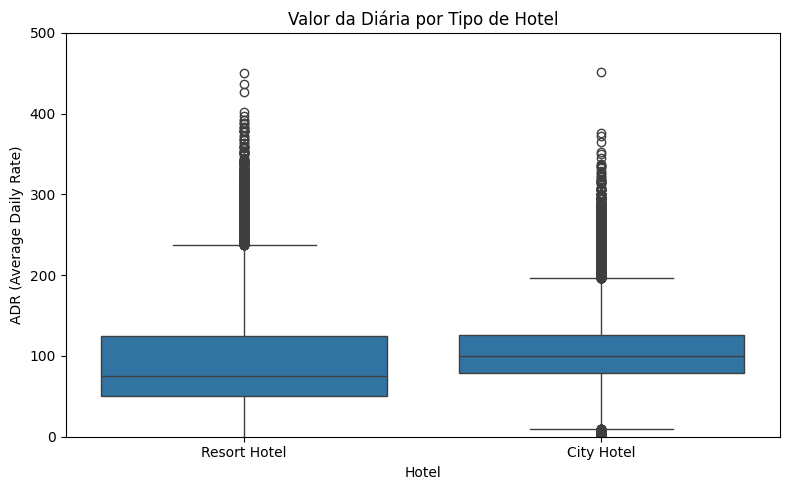

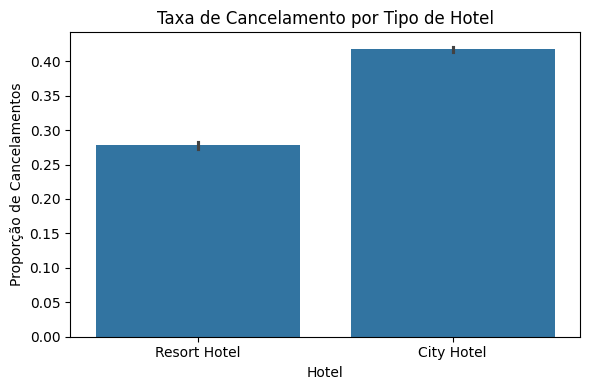

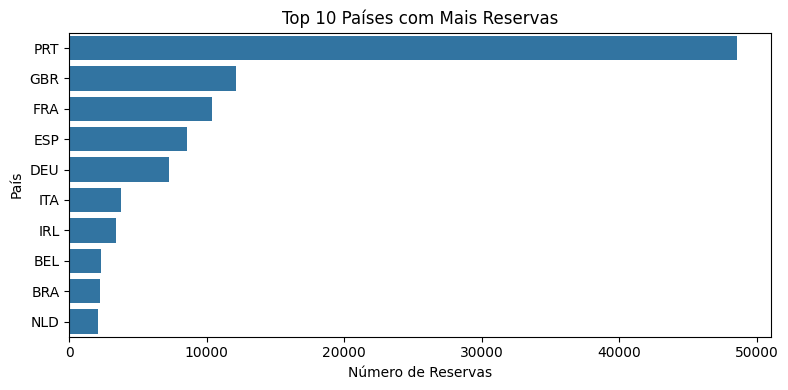

,is_canceled
customer_type,
Transient,0.407463
Contract,0.309617
Transient-Party,0.254299
Group,0.102253


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=dados, x='hotel')
plt.title('Reservas por Tipo de Hotel')
plt.xlabel('Hotel')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()
print()

plt.figure(figsize=(8,4))
sns.histplot(data=dados, x='lead_time', bins=50, kde=True)
plt.title('Distribuição do Lead Time')
plt.xlabel('Dias de antecedência')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()
print()

plt.figure(figsize=(8,5))
sns.boxplot(data=dados, x='hotel', y='adr')
plt.title('Valor da Diária por Tipo de Hotel')
plt.ylabel('ADR (Average Daily Rate)')
plt.xlabel('Hotel')
plt.ylim(0, 500)  # Limite para facilitar visualização
plt.tight_layout()
plt.show()

print()

plt.figure(figsize=(6,4))
sns.barplot(data=dados, x='hotel', y='is_canceled')
plt.title('Taxa de Cancelamento por Tipo de Hotel')
plt.ylabel('Proporção de Cancelamentos')
plt.xlabel('Hotel')
plt.tight_layout()
plt.show()

print()

top_paises = dados['country'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_paises.values, y=top_paises.index)
plt.title('Top 10 Países com Mais Reservas')
plt.xlabel('Número de Reservas')
plt.ylabel('País')
plt.tight_layout()
plt.show()


dados['customer_type'].value_counts()
dados.groupby('customer_type')['is_canceled'].mean().sort_values(ascending=False)


### b) Modelo de Regressão Logística (60%)


DEFINIÇÃO DE VARIÁVEIS CATEGÓRICAS E NUMÉRICAS E CÁLCULO DO VIF PARA IDENTIFICAÇÃO DE MULTICOLINEARIDADE.

In [50]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

numericas = [
    'lead_time',
    'adults',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'adr'
]

categoricas = [
    'arrival_date_month',
    'country',
    'deposit_type',
    'customer_type'
]

# One-Hot Encoding
dados_modelo = pd.get_dummies(dados[numericas + categoricas], drop_first=True)

# Converte booleanos para inteiros
dados_modelo = dados_modelo.astype(int)

# Garante que todos são numéricos
dados_modelo = dados_modelo.apply(pd.to_numeric, errors='coerce')
dados_modelo = dados_modelo.replace([np.inf, -np.inf], np.nan)
dados_modelo = dados_modelo.dropna()

# Amostragem de 30% dos dados para cálculo do VIF
amostra = dados_modelo.sample(frac=0.1, random_state=42)

# Cálculo do VIF
X = add_constant(amostra)
vif = pd.DataFrame()
vif['Variável'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif.sort_values(by='VIF', ascending=False)

# Filtrar apenas as variáveis com VIF > 10 (desconsiderando a constante)
vif_altas = vif[(vif['Variável'] != 'const') & (vif['VIF'] > 10)]

# Exibir o resultado
vif_altas.sort_values(by='VIF', ascending=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Variável,VIF
151,country_PRT,47.544563
75,country_GBR,19.032362
72,country_FRA,16.629404
67,country_ESP,13.439630
59,country_DEU,11.531607


Considerando os valores obtidos para VIF na variável country, optar-se-á por excluir a variável country, pois além de provavelmente apresentar multicolinearidade, gera muitas colunas a partir da aplicação do one_Hot_Encoding.

In [58]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Variáveis selecionadas (sem 'country')
numericas = [
    'lead_time',
    'adults',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'adr'
]

categoricas = [
    'arrival_date_month',
    'deposit_type',
    'customer_type'
]

# One-Hot Encoding (sem country)
dados_modelo = pd.get_dummies(dados[numericas + categoricas], drop_first=True)

# Converte booleanos para inteiros
dados_modelo = dados_modelo.astype(int)

# Garante que todos são numéricos e remove valores inválidos
dados_modelo = dados_modelo.apply(pd.to_numeric, errors='coerce')
dados_modelo = dados_modelo.replace([np.inf, -np.inf], np.nan)
dados_modelo = dados_modelo.dropna()


MODELAGEM
PRESSUPOSTOS:
1. Na Regressão Logística Binária a variável dependente é binária.
No caso da análise de cancelamento, a variável dependente é dados_modelo['is_canceled'], que assume valores 0 ou 1, ou
seja, binária.

2. Para Regressão Logística Binária, o fator da variável dependente deve representar o desejo do
analista.

O "desejo do analista" significa que o valor 1 deve representar o desfecho de interesse, ou seja, aquilo que o analista quer prever ou entender melhor.
No caso de churn: A variável 'is_canceled' já está assim:
is_canceled = 1 → cliente cancelou reserva
is_canceled = 0 → cliente não cancelou

Então, ao fazer a regressão logística, o modelo vai estimar a probabilidade de is_canceled = 1, ou seja, a probabilidade do cliente cancelar.

3. Apenas as variáveis importantes deve ser alocadas no modelo.
Será realizado.

4. Não deverá possuir multicolinearidade.
Já testado.

5. As varáveis independentes são lineares em relação ao log das probabilidades no Logit.
Será analisado a seguir.

6. Regressão Logística requer um número grande de observações.
Considerando que se tem 119390 observações válidas, considera-se atendido esse pressuposto.

Serão então testados os pressupostos 3 e 5.

APLICAÇÃO DA REGRESSÃO LOGÍSTICA

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Alvo e preditores
X = dados_modelo
y = dados['is_canceled'].loc[X.index]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar modelo
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Prever
y_pred = modelo.predict(X_test)

# Avaliação
print("Acurácia       :", accuracy_score(y_test, y_pred))
print("Precisão       :", precision_score(y_test, y_pred))
print("Recall         :", recall_score(y_test, y_pred))
print("F1-score       :", f1_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))

# Análise dos coeficientes
coeficientes = pd.Series(modelo.coef_[0], index=X.columns)
coef_ordenados = coeficientes.sort_values(key=np.abs, ascending=False)

print("\n Variáveis mais influentes no cancelamento (análise do módulo do coeficiente):\n")
print(coef_ordenados.head(10))


Acurácia       : 0.7714213920763883
Precisão       : 0.9375
Recall         : 0.41382412474698255
F1-score       : 0.5741925417381807

Matriz de Confusão:
 [[22110   368]
 [ 7819  5520]]

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.74      0.98      0.84     22478
           1       0.94      0.41      0.57     13339

    accuracy                           0.77     35817
   macro avg       0.84      0.70      0.71     35817
weighted avg       0.81      0.77      0.74     35817


 Variáveis mais influentes no cancelamento (análise do módulo do coeficiente):

deposit_type_Non Refund           5.353013
previous_cancellations            2.826253
customer_type_Transient           1.036378
previous_bookings_not_canceled   -0.820465
arrival_date_month_September     -0.438211
customer_type_Group              -0.395801
arrival_date_month_July          -0.328345
arrival_date_month_August        -0.278725
customer_type_Transient-Party   

O modelo só chama classifica como "cancelado" se tiver muita certeza, o que aumenta a precisão mas reduz o recall.

Isso pode indicar base desbalanceada, fato eventualmente representativo de mais reservas não canceladas do que canceladas.

### c) Análise das features


Variáveis mais influentes no cancelamento (análise do módulo do coeficiente):

1. deposit_type_Non Refund           5.353013
2. previous_cancellations            2.826253
3. customer_type_Transient           1.036378
4. previous_bookings_not_canceled   -0.820465
5. arrival_date_month_September     -0.438211
6. customer_type_Group              -0.395801
7. arrival_date_month_July          -0.328345
8. arrival_date_month_August        -0.278725
9. customer_type_Transient-Party     0.277023
10. arrival_date_month_June          -0.241295lise das Features (20%)


- Variáveis que aumentam a chance de cancelamento:
O modelo de regressão logística identificou algumas variáveis com coeficientes positivos, ou seja, quanto mais presentes nos dados, maior a probabilidade de cancelamento da reserva:

deposit_type_Non Refund: Clientes que optam por depósitos não reembolsáveis apresentaram uma probabilidade significativamente maior de cancelamento. Embora isso pareça contraditório, pode estar relacionado a reservas feitas impulsivamente, clientes menos comprometidos ou falhas na política de cobrança.

previous_cancellations: O histórico de cancelamentos é um forte preditor. Clientes que já cancelaram reservas anteriormente têm maior intenção de cancelar novamente, sugerindo um padrão de comportamento.

customer_type_Transient: Clientes classificados como transitórios — geralmente viajantes independentes sem contrato ou vínculo corporativo — tendem a cancelar com maior frequência, possivelmente pela flexibilidade.

customer_type_Transient-Party: Grupos de clientes transitórios também apresentaram maior risco de cancelamento, talvez por serem mais suscetíveis a mudanças de planos em conjunto.

- Variáveis que reduzem a chance de cancelamento
Outras variáveis apresentaram coeficientes negativos, o que significa que sua presença está associada a uma menor probabilidade de cancelamento:

previous_bookings_not_canceled: Clientes com um histórico de reservas concluídas (sem cancelamentos) têm uma chance significativamente menor de cancelar novamente. Isso mostra que o comportamento anterior confiável é um bom indicativo de estabilidade, evidenciando mais uma vez que o padrão de comportamento é um fator que tem alto impacto em comportamento futuro.

arrival_date_month_September, July, August, June: Reservas com chegada nos meses de alta temporada ou férias escolares (como julho e agosto) tendem a ser mais estáveis. A demanda maior e o planejamento antecipado nesses períodos podem reduzir o índice de desistências.

customer_type_Group: Clientes identificados como parte de grupos organizados ou corporativos apresentam menor tendência ao cancelamento, o que pode refletir compromissos já assumidos, contratos ou maior rigidez no planejamento.


Conclusão:
* Comportamento passado (cancelamentos anteriores, histórico de comparecimento) é altamente preditivo.

* Tipo de cliente e forma de pagamento têm grande influência.

* Sazonalidade também afeta cancelamentos: reservas em meses turísticos tendem a ser mais estáveis.

### d) Justificativa do Método (10%)


A regressão linear é um modelo de previsão ou explicação, que aprende a partir do conjunto de dados e, respeitados os pressupostos da regressão, traça uma reta que representa a relação entre variável explicativa e variável dependente, para que seja possível prever a variável dependente a partir de um valor da variável explicativa.

A regressão logística tem o objetivo de classificação binária, que tem como saída um valor entre 0 e 1, que indica a probabilidade de se rejeitar a hipótese nula, que é justamente o desejo do analista. Em outras palavras, a partir de veriáveis explicativas, a regressão fornece um resultado entre 0 e 1, que é então arredondado para 0 ou 1, que indica a classificação da target em uma classe ou em outra. Então, no caso do exercício, ela fornecerá o resultado se determinado cliente, dados vários valores para as variáveis explicativas, irá cancelar ou não a reserva.

## Questão 3

### a) Análise Descritiva dos Dados (10%)

In [66]:
import pandas as pd

# Especificação do caminho do arquivo csv

path = '/content/drive/MyDrive/AEDI/Year2010-2011.csv'

dados = pd.read_csv(path, encoding='latin1')

# Estrutura da base
dados.info()

# Estatísticas para variáveis numéricas
dados.describe()

# Valores ausentes
dados.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,0
Customer ID,135080
Description,1454
StockCode,0
Invoice,0
Quantity,0
InvoiceDate,0
Price,0
Country,0


### b) Comparação entre Países (ANOVA) (40%)


### c) Ajustes no Modelo de ANOVA (40%)


### d) Interpretação e Tomada de Decisão (10%)
